In [1]:
import os
import sys
import re
import tqdm
from dotenv import load_dotenv
import supervision as sv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

load_dotenv('.env')
DIR_SRC = os.getenv('DIR_SRC')
DIR_DATA = os.path.join(os.getenv('DIR_DATA'), "final")

MULTIPLIER = 1000 # resize the iamge for visualization


In [13]:
metadata = pd.read_csv(os.path.join(DIR_SRC, "metadata.csv"))
os.chdir(DIR_DATA)

In [2]:
from scipy.ndimage import gaussian_filter

def from_txt_to_det(ls_txt):
    ls_det = []
    for f in ls_txt:
        with open(f) as f:
            ls_det += [l.strip() for l in f.readlines()] 
    return ls_det

def from_det_to_cir(ls_det):
    ls_cir = []
    for det in ls_det:
        # split by space
        dets = det.split(" ")
        x = float(dets[1])
        y = float(dets[2])
        w = float(dets[3])
        h = float(dets[4])
        r = (w * h) ** 0.5 / 2 # radius
        ls_cir += [(x, y, r)]
    return ls_cir

def make_heatmap(ls_cir):
    # Image size
    image_size = (1000, 1000)
    # Create an empty image grid
    heatmap = np.zeros(image_size)
    # Resize the coordinates and plot circles
    for x, y, r in ls_cir:
        x_resized = int(x * image_size[0])
        y_resized = int(y * image_size[1])
        radius_resized = int(r * image_size[0])
        if radius_resized == 0:
            radius_resized = 1

        # Create a grid of the same size as the image
        Y, X = np.ogrid[:image_size[0], :image_size[1]]
        distance = np.sqrt((X - x_resized) ** 2 + (Y - y_resized) ** 2)

        # Add intensity to the heatmap
        num = -(distance**2)
        den = 2 * (radius_resized**2)
        heatmap += np.exp(num / den)
    heatmap = gaussian_filter(heatmap, sigma=5)
    # return
    return heatmap

def plot_heatmap(heatmap):
    plt.imshow(heatmap, cmap='hot', extent=(0, 1, 0, 1))
    plt.clim(0, 6) # standardize the colorbar and c max
    plt.colorbar(label='Intensity')
    plt.title('Heatmap of Circle Distribution')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.axis("off")
    plt.show()

## test_a03

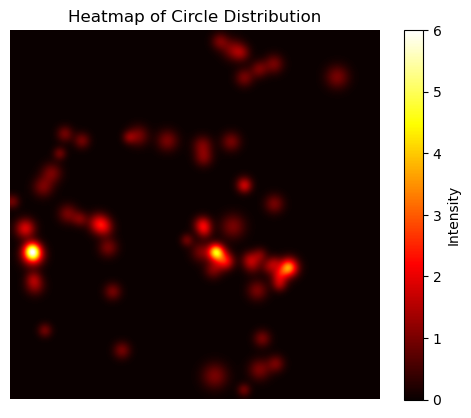

In [11]:
split = "test_a03"
ls_txt = np.sort([txt for txt in metadata.query("split == @split")["path_txt"].values if "ctrl" in txt])
ls_det = from_txt_to_det(ls_txt)
ls_cir = from_det_to_cir(ls_det)
heatmap = make_heatmap(ls_cir)
plot_heatmap(heatmap)

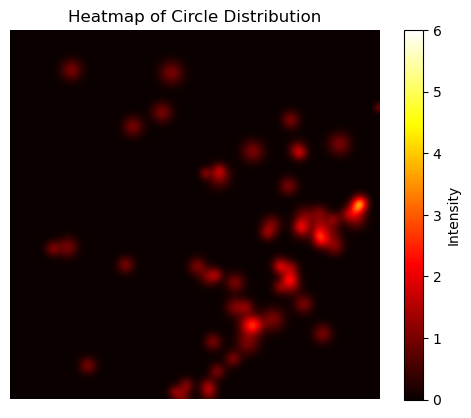

In [12]:
ls_txt = np.sort([txt for txt in metadata.query("split == @split")["path_txt"].values if "virus" in txt])
ls_det = from_txt_to_det(ls_txt)
ls_cir = from_det_to_cir(ls_det)
heatmap = make_heatmap(ls_cir)
plot_heatmap(heatmap)

## test_b06

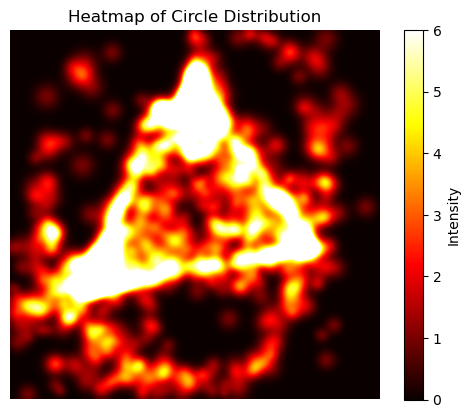

In [17]:
split = "test_b06"
ls_txt = np.sort([txt for txt in metadata.query("split == @split")["path_txt"].values if "t1" in txt])
ls_det = from_txt_to_det(ls_txt)
ls_cir = from_det_to_cir(ls_det)
heatmap = make_heatmap(ls_cir)
plot_heatmap(heatmap)

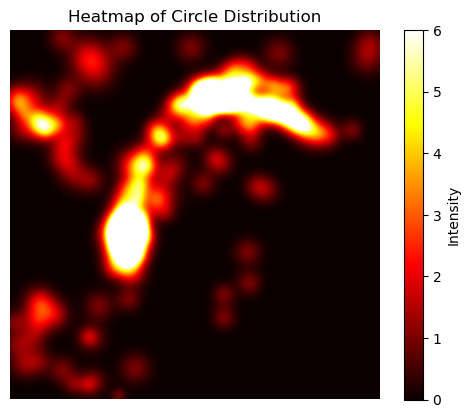

In [18]:
ls_txt = np.sort([txt for txt in metadata.query("split == @split")["path_txt"].values if "t2" in txt])
ls_det = from_txt_to_det(ls_txt)
ls_cir = from_det_to_cir(ls_det)
heatmap = make_heatmap(ls_cir)
plot_heatmap(heatmap)

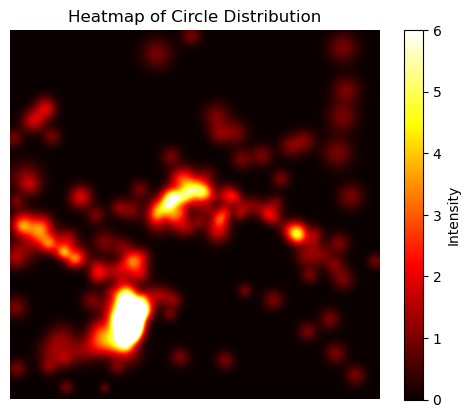

In [19]:
ls_txt = np.sort([txt for txt in metadata.query("split == @split")["path_txt"].values if "t3" in txt])
ls_det = from_txt_to_det(ls_txt)
ls_cir = from_det_to_cir(ls_det)
heatmap = make_heatmap(ls_cir)
plot_heatmap(heatmap)